# Exercises and Extra-Curriculum

## Exercises:

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

1. Create a straight line dataset using the linear regression formula $$y = w * X + b$$

* Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.


In [3]:
weight = 0.3
bias = 0.9

X = torch.arange(start=0, end=1, step=0.01)
X = X.unsqueeze(dim=1)
y = weight * X + bias

In [4]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
X_train_gpu = X_train.to(device)
y_train_gpu = y_train.to(device)

X_test_gpu = X_test.to(device)
y_test_gpu = y_test.to(device)

In [6]:
def plot_preds(train_data = X_train, train_labels = y_train,
               test_data = X_test, test_labels = y_test,
               predictions = None):
    
    plt.figure(figsize = (10, 7))
    plt.scatter(x=train_data, y=train_labels, c="b", 
                label="Training Data", s=4)
    plt.scatter(x=test_data, y=test_labels, c="r",
                label="Test Data", s=4)
    if predictions != None:
        plt.scatter(x=test_data, y=predictions, c="purple",
                    label="Predicitons", s=4)
    plt.legend(prop={"size":14})
    plt.grid(True)

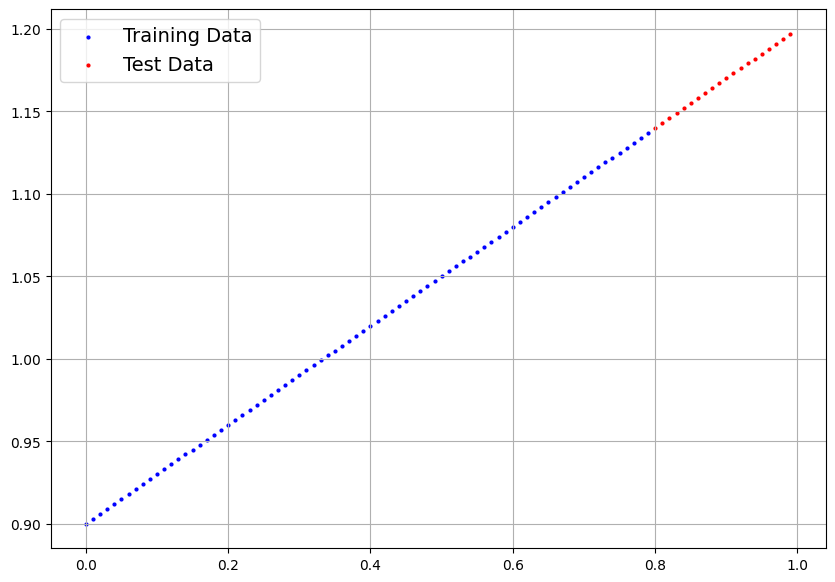

In [7]:
plot_preds()

2. Build a PyTorch model by subclassing nn.Module.

* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for weights and one for bias.

* Implement the `forward()` method to compute the linear regression function you used to create the dataset in (1).

* Once you've constructed the model, make an instance of it and check it's `state_dict()`.

* **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.


In [8]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1, 
                                      device=device)
    def forward(self, x):
        return self.linear_layer(x)

In [9]:
torch.manual_seed(69)
model2 = LinearRegression()
model2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.5017]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.7067], device='cuda:0'))])

In [10]:
next(model2.parameters()).device

device(type='cuda', index=0)

3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in (2).
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.


In [11]:
loss_fn = nn.L1Loss()
optimizador = torch.optim.SGD(params=model2.parameters(),
                              lr=0.01)
epochs = 300

In [12]:
def train_model(model:LinearRegression, optimizer:torch.optim.SGD, 
                loss_f:nn.L1Loss, train_data:torch.Tensor, 
                train_labels:torch.Tensor, epocas:int):
    train_losses = []
    for epoca in range(epocas+1):
        model.train()
        
        train_preds = model(train_data)
        
        loss = loss_f(train_preds, train_labels)
        train_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoca % 20 == 0:
            print(f"Epoca: {epoca} | Train Loss: {loss.item()}")
    
    return train_preds, train_losses

In [13]:
train_preds, train_losses = train_model(model=model2,
                                        optimizer=optimizador,
                                        loss_f=loss_fn,
                                        train_data=X_train_gpu,
                                        train_labels=y_train_gpu,
                                        epocas=epochs)

Epoca: 0 | Train Loss: 0.5099973082542419
Epoca: 20 | Train Loss: 0.27895888686180115
Epoca: 40 | Train Loss: 0.15366409718990326
Epoca: 60 | Train Loss: 0.12033678591251373
Epoca: 80 | Train Loss: 0.10890312492847443
Epoca: 100 | Train Loss: 0.101457379758358
Epoca: 120 | Train Loss: 0.09452527016401291
Epoca: 140 | Train Loss: 0.08767367899417877
Epoca: 160 | Train Loss: 0.08082208782434464
Epoca: 180 | Train Loss: 0.0739709660410881
Epoca: 200 | Train Loss: 0.06711920350790024
Epoca: 220 | Train Loss: 0.060267794877290726
Epoca: 240 | Train Loss: 0.053416695445775986
Epoca: 260 | Train Loss: 0.0465647391974926
Epoca: 280 | Train Loss: 0.03971339389681816
Epoca: 300 | Train Loss: 0.03286220505833626


4. Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


In [14]:
def eval_model(model:LinearRegression, loss_f:nn.L1Loss,
               test_data:torch.Tensor, test_labels: torch.Tensor):
    
    model.eval()

    with torch.inference_mode():
        pred = model(test_data)
        loss = loss_f(pred, test_labels)

    print(f"Test Loss: {loss.item()}")
    
    return pred, loss.item()    

In [15]:
test_preds, test_loss = eval_model(model=model2,
                                     loss_f=loss_fn,
                                     test_data=X_test_gpu,
                                     test_labels=y_test_gpu)

Test Loss: 0.07676482945680618


In [16]:
test_loss

0.07676482945680618

In [17]:
test_preds

tensor([[1.0786],
        [1.0800],
        [1.0814],
        [1.0828],
        [1.0841],
        [1.0855],
        [1.0869],
        [1.0883],
        [1.0897],
        [1.0910],
        [1.0924],
        [1.0938],
        [1.0952],
        [1.0966],
        [1.0979],
        [1.0993],
        [1.1007],
        [1.1021],
        [1.1035],
        [1.1049]], device='cuda:0')

In [18]:
test_preds_cpu = test_preds.to("cpu")

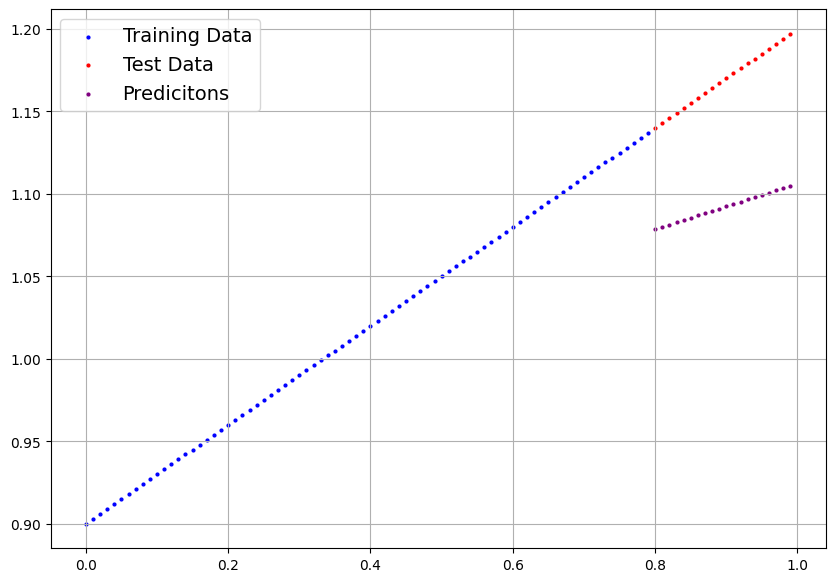

In [19]:
plot_preds(predictions=test_preds_cpu)

5. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in (2). and load in the `state_dict()` you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from (4).


In [20]:
from pathlib import Path

In [21]:
# Obtener la ruta absoluta del directorio del script actual (03_exercises.ipynb)
current_dir = Path.cwd()  # En un notebook, esto obtiene la ubicación actual

# Subir dos niveles para llegar a la raíz del proyecto
root_dir = current_dir.parent.parent  # Sube desde 02_pytorch_workflow hasta la raíz

# Definir la ruta correcta del directorio "modelos" en la raíz
save_dir = root_dir / "modelos"

# Verificar que el directorio ya existe (para evitar crearlo en el lugar incorrecto)
if not save_dir.exists():
    raise FileNotFoundError(f"El directorio '{save_dir}' no existe. Verifica la estructura del proyecto.")

# Ruta completa del archivo del modelo
model_path = save_dir / "02_model2.pth"

# Guardar el modelo
torch.save(model2.state_dict(), model_path)

print(f"Modelo guardado en: {model_path.resolve()}")


Modelo guardado en: /home/miguel/Documents/Udemy/pytorch-fundamentals/modelos/02_model2.pth


## Extra-Curriculum:


* Listen to The Unofficial PyTorch Optimization Loop Song (to help remember the steps in a PyTorch training/testing loop).
* Read What is torch.nn, really? by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
* Spend 10-minutes scrolling through and checking out the PyTorch documentation cheatsheet for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the loading and saving documentation on the PyTorch website to become more familiar with the different saving and loading options in PyTorch.
* Spend 1-2 hours reading/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
* Wikipedia page for gradient descent
* Gradient Descent Algorithm — a deep dive by Robert Kwiatkowski
* Gradient descent, how neural networks learn video by 3Blue1Brown
* What is backpropagation really doing? video by 3Blue1Brown
* Backpropagation Wikipedia Page
